In [1]:
# ----------------------------------------------------------------------------
# Author        :    Vasileios Perifanis
# Affiliation   :    Euclid team, Democritus University of Thrace, Dept. of Electrical & Computer Engineering
# Created Date  :    03/2022
# version       :    1.0
# ---------------------------------------------------------------------------

# Exploratory Data Analysis (EDA)

Techniques for data exploration and analysis to summarize features and observations on the given dataset.

Common EDA applications:
   - Data visualization
   - Identification of important features
   - Errors identification
   - Baseline machine learning algorithms
   - Correlations between input data and input-output data

# Dataset
We will use the Titanic <a href="https://www.kaggle.com/c/titanic">dataset</a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data analysis
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("datasets/titanic_train.csv", header=0) # read csv

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
data.columns # get the columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

| Feature | Description |
| --- | --- |
| PassengerId | id
| Survived | 0-1 (target variable)
| Pclass | Ticket Class (1,2 or 3)
| Name | Passenger's Name
| Sex | Passenger's Sex (male or female)
| Age | Passenger's Age
| SibSp | Number of siblings/spouses aboard the Titanic
| Parch | Number of parents/children aboard the Titanic
| Ticket | Ticket Number
| Fare | Paid amount for the trip
| Cabin | Cabin's Number
| Embarked | Town (C = Cherbourg, Q = Queenstown, S = Southampton)

In [6]:
data.head() # show the first 5 observations

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.shape # get the number of rows and columns

(891, 12)

In [8]:
data.describe() # summarize numerical statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Observations 

1. There are 891 samples (rows) with 12 features (columns)

2. The mean age is 29.7 and the median age is 28. If there is a significant difference between the mean and median values, then it is highly likely that the dataset contains outliers. For instance, considering that we have the following age samples: [2, 30, 31, 32], the mean value is 23.75 and the median is 30.5. 

3. The existence of outliers is observed in the Fare feature, i.e., the trip’s payment amount. The mean value is 32.2 and the median is 14.45. Hence, we can conclude that exists at least one sample with a high Fare amount.

In [9]:
data.nlargest(10, ['Age'])['Age']

630    80.0
851    74.0
96     71.0
493    71.0
116    70.5
672    70.0
745    70.0
33     66.0
54     65.0
280    65.0
Name: Age, dtype: float64

In [10]:
data.nlargest(10, ['Fare'])['Fare']

258    512.3292
679    512.3292
737    512.3292
27     263.0000
88     263.0000
341    263.0000
438    263.0000
311    262.3750
742    262.3750
118    247.5208
Name: Fare, dtype: float64

In [11]:
for col in list(data.columns):
    print(col, len(data[col].unique()))

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 4


In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

‘Age’ has 177, ‘Cabin’ has 687 and ‘Embarked’ has 2 NaN/null values.

In [13]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

342 out of 891 passengers (38.4%) have survived. Hence, the dataset is imbalanced.

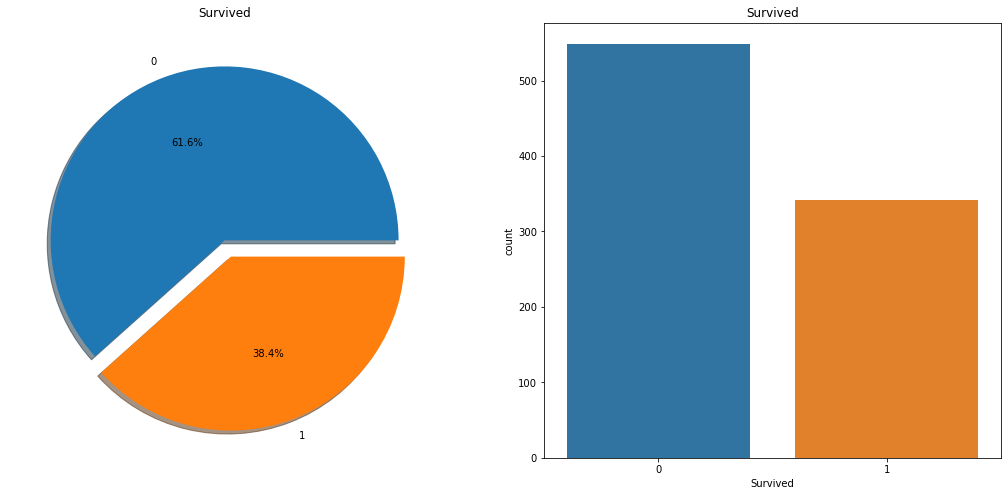

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [15]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Approximately, the 75% of female population has survived, while only the 19% of male population has survived the trip.

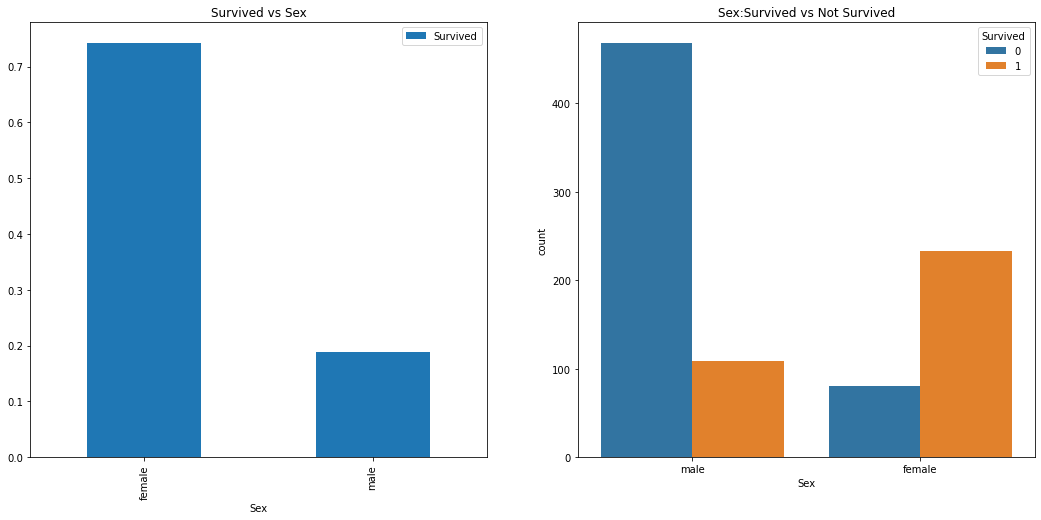

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Not Survived')
plt.show()

In [18]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


As observed, the passengers of class 3 (lower class) have lower probability of surviving (25%). On the other hand, passengers from class 2 have 48% probability of surviving and finally, passengers from class 3 have 63% probability of surviving. 

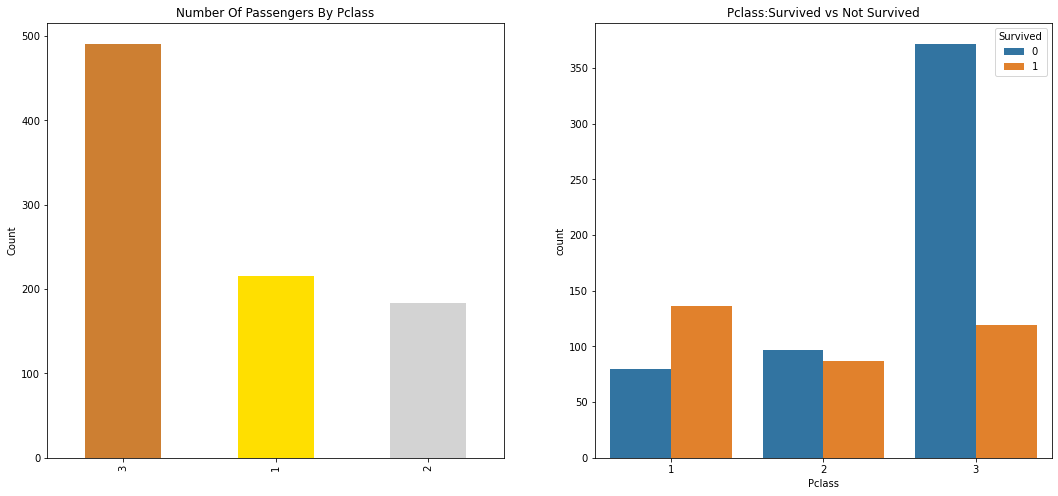

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Not Survived')
plt.show()

In [21]:
print('Oldest Passenger:',data['Age'].max(),'Years')
print('Youngest Passenger:',data['Age'].min(),'Years')
print('Average Age:',data['Age'].mean(),'Years')

Oldest Passenger: 80.0 Years
Youngest Passenger: 0.42 Years
Average Age: 29.69911764705882 Years


In [22]:
children = data.loc[data['Age'] <= 18]

In [23]:
pd.crosstab(children.Age,children.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Age,,,
0.420000,0,1,1
0.670000,0,1,1
0.750000,0,2,2
0.830000,0,2,2
0.920000,0,1,1
1.000000,2,5,7
2.000000,7,3,10
3.000000,1,5,6
4.000000,3,7,10


In [24]:
pd.crosstab(children.Age,children.Pclass,margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
Age,,,,
0.420000,0,0,1,1
0.670000,0,1,0,1
0.750000,0,0,2,2
0.830000,0,2,0,2
0.920000,1,0,0,1
1.000000,0,2,5,7
2.000000,1,2,7,10
3.000000,0,3,3,6
4.000000,1,2,7,10


The number of children increases by the class, while the survival rate of children is 50%. However, we have 177 null values.

In [25]:
data['Age'].isnull().sum()

177

# Observations

1. The gender attribute affects the survival.
2. The class attribute affects the survival rate.
3. The survival rate of children is high.

# Handling Null Values in the Titanic Dataset

In many cases, datasets contain multiple null values in one or more features. A simple approach to handle null values is to eliminate those samples. A second approach is to eliminate the feature (column) that contains multiple null values. These approaches can lead to the generation of a capable machine learning model. However, we need to handle null values at least in the inference stage.

In the given dataset, we observed that the minimum age is 0.4 and the maximum is 80. In addition, most children have survived. Hence, it is not that easy to simply delete or ignore the null values. A common approach is to replace the null values using the mean, median, mode or a constant value. However, the age range varies significantly and is not straightforward to just replace the null values with a constant.

Fortunately, we are given the name of the passenger. Although this feature cannot be included in the training stage of a machine learning model, it helps us to approximate a sample's empty 'age' attribute. The name attribute contains salutations such as Mr, Mrs or Miss. Hence, in empty values that we observe these salutations, it is highly likely that the individual is an adult.

In [26]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #extract the Salutations

In [27]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


It is observed that each salutation corresponds to a single gender. In addition, we observe some grammatical errors such as Mlle and Mmme. 

In [28]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady',
                         'Countess','Jonkheer','Col','Rev','Capt',
                         'Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs',
                         'Mrs','Other','Other','Other','Mr',
                         'Mr','Mr'],inplace=True)

In [29]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [30]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [31]:
# Assigning the NaN Values the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [32]:
data.Age.isnull().sum()

0

In [33]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

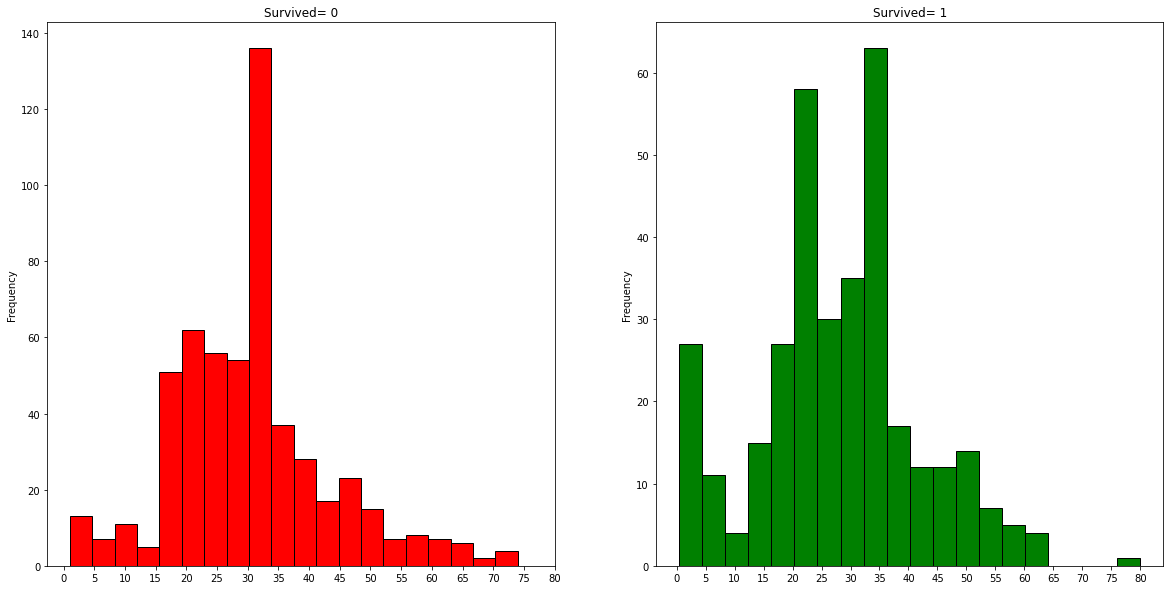

In [34]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

# Observations

1. Most children under 5 years old have survived.
2. Most individuals that have not survived belong to the 30-35 age group.
3. The oldest individual (80) has survived.

In [35]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

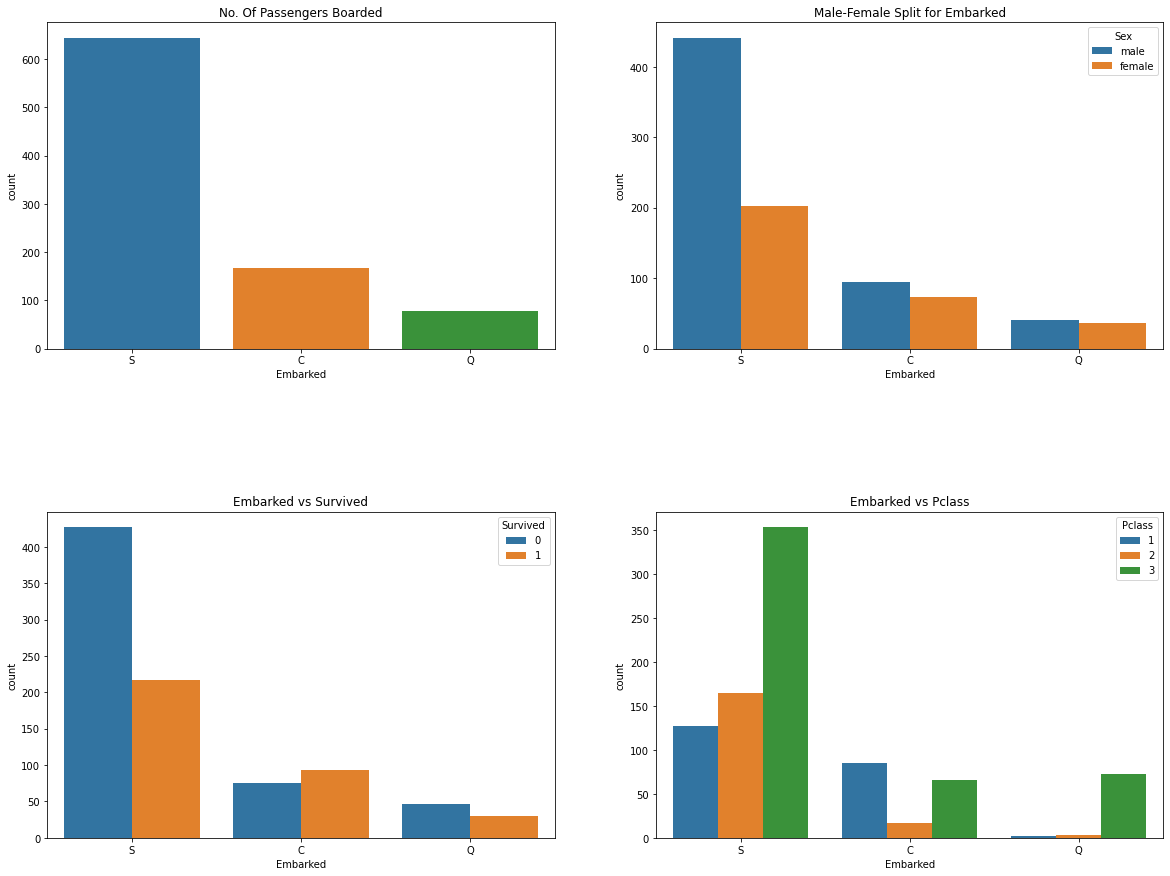

In [36]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

# Observations

1. Most individuals departed from port S and are mostly men.
2. The men/women ratio departed from port C is almost equivalent.
3. Most individuals departed from port S belong to class 3. However, most individuals from port S have not survived.
4. Most individuals departed from port Q belong to class 3. However, most individuals from port Q have not survived.

In [37]:
# Fill the two NaNs with 'S'
data['Embarked'].fillna('S',inplace=True)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64

In [38]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [39]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


# Observations

1. The 35% of the passengers who did not travel with a relative survived.
2. From the individuals traveling with 1 or 2 relatives, aprroximately the 50% of them have survived.
3. The more the relatives in the trip, the lower the survival rate.
4. Individuals with many relatives belong to class 3. Families with 5 or more members did not survive.

In [40]:
print('Highest Fare:',data['Fare'].max())
print('Lowest Fare:',data['Fare'].min())
print('Average Fare:',data['Fare'].mean())

Highest Fare: 512.3292
Lowest Fare: 0.0
Average Fare: 32.204207968574636


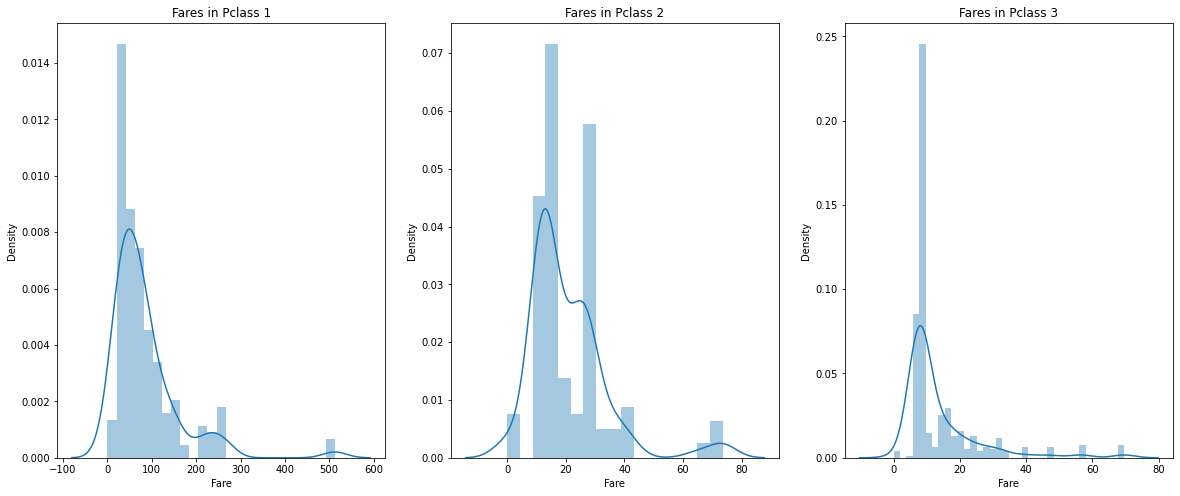

In [41]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

# Summarized Observations

1. The survival rate is higher on women and children.
2. Passengers of the first class have higher survival rate, while passengers of the third class have lower survival rate.
3. Individuals traveling with their relatives with limited members (e.g., 3) have higher survival rate.

In [42]:
data['Sex'] = data['Sex'].map(dict(zip(['male','female'],[0,1])))
data['Embarked'] = data['Embarked'].map(dict(zip(['S','C','Q'],[0,1,2])))

In [43]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,Mr


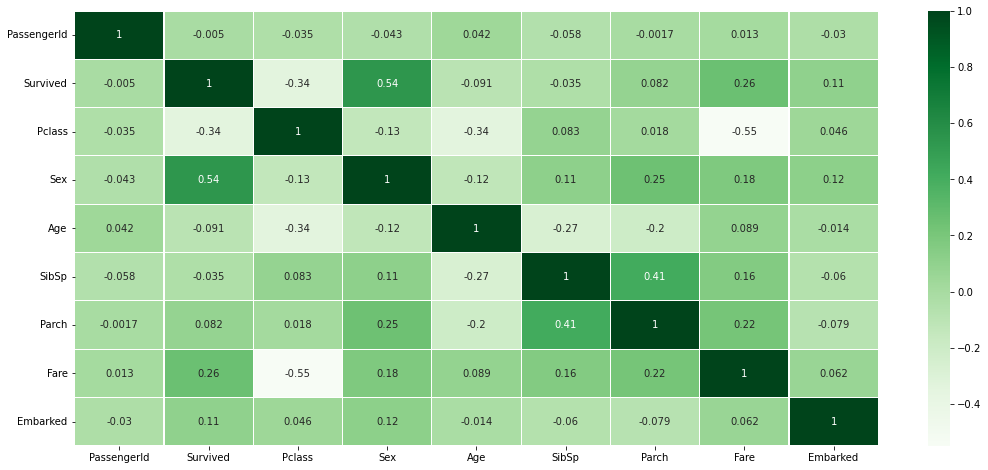

In [44]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot=True,cmap='Greens',linewidths=0.2)
plt.show()

# Correlations

The heatmap above shows the correlation among features (considering the numeric data). 

In general, a correlation value is in the range [-1,1]. A negative correlation implies that with the increase of the first feature, the second feature decreases.

Based on the heatmap, it is observed that the target feature, i.e., the survival has:
1. Positive correlation with the gender attribute. Recall that we transformed women to the label 1.
2. Negative correlation with the age attribute. Recall that the lower the age the higher the survival rate.
3. Negative correlation with the class. Recall that the higher the class, the lower the survival rate.
4. Positive correlation with the Fare amount. Recall that the higher the Fare, the lower the class and the higher the survival rate.